In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sampled_data.csv")

In [3]:
df.head()

,Transaction ID,Customer ID,Customer Location,IP Address,Shipping Address,Billing Address,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour
0,75694840-8345-4983-8418-ba5c8a417ba1,9c8a27e3-5c82-418c-9a98-a783e58a375d,Jeromestad,115.160.37.120,Unit 3230 Box 1139\r\nDPO AA 97507,Unit 3230 Box 1139\r\nDPO AA 97507,526.68,2024-02-02 19:24:23,debit card,toys & games,1,14,desktop,0,137,19
1,f0f6100d-83b4-4724-9ab9-42d25a6a9642,0aab89da-4454-47de-aee7-a9347a3fda38,Arroyoborough,21.110.203.111,"485 Wendy Ridge Suite 573\r\nDavidchester, NH ...","485 Wendy Ridge Suite 573\r\nDavidchester, NH ...",292.86,2024-01-04 03:40:16,debit card,home & garden,3,22,mobile,0,148,3
2,ca1dc507-6550-40cc-bb70-bfe606772da2,02bbabf5-29cc-400b-8d00-41494b161364,Danielton,42.211.181.254,"5066 Joseph Plains Apt. 182\r\nNguyenfort, MS ...","5066 Joseph Plains Apt. 182\r\nNguyenfort, MS ...",31.46,2024-01-20 06:15:28,debit card,toys & games,4,32,desktop,0,146,6
3,1e7b965c-3652-4535-ae4c-fc1dd7319fa6,b3cab3f2-d134-42fc-a882-9eeda6f67fb8,West Shannon,195.117.41.110,"7121 Hardy Parkways Suite 758\r\nNorth Shelby,...","7121 Hardy Parkways Suite 758\r\nNorth Shelby,...",41.78,2024-03-29 15:53:59,bank transfer,clothing,5,27,mobile,0,216,15
4,6886f533-638f-412c-93f4-36b80c0123ce,b06e8928-9648-452e-bf4b-b4e91b4deeb4,West Heidishire,57.86.110.188,"1675 Robbins Causeway Apt. 175\r\nNew Ryan, PR...","1675 Robbins Causeway Apt. 175\r\nNew Ryan, PR...",119.07,2024-03-19 14:56:24,bank transfer,home & garden,1,15,desktop,0,283,14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73648 entries, 0 to 73647
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      73648 non-null  object 
 1   Customer ID         73648 non-null  object 
 2   Customer Location   73648 non-null  object 
 3   IP Address          73648 non-null  object 
 4   Shipping Address    73648 non-null  object 
 5   Billing Address     73648 non-null  object 
 6   Transaction Amount  73648 non-null  float64
 7   Transaction Date    73648 non-null  object 
 8   Payment Method      73648 non-null  object 
 9   Product Category    73648 non-null  object 
 10  Quantity            73648 non-null  int64  
 11  Customer Age        73648 non-null  int64  
 12  Device Used         73648 non-null  object 
 13  Is Fraudulent       73648 non-null  int64  
 14  Account Age Days    73648 non-null  int64  
 15  Transaction Hour    73648 non-null  int64  
dtypes: f

In [5]:
#Change the type of the date
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])

In [6]:
#Change column names to make them all small and has underscore
# List comprehension to generate new column names
new_column_names = [name.lower().replace(" ", "_") for name in df.columns]

# Create a dictionary mapping old column names to new ones
columns_dict = dict(zip(df.columns, new_column_names))

# Rename the columns in the DataFrame
df.rename(columns=columns_dict, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73648 entries, 0 to 73647
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      73648 non-null  object        
 1   customer_id         73648 non-null  object        
 2   customer_location   73648 non-null  object        
 3   ip_address          73648 non-null  object        
 4   shipping_address    73648 non-null  object        
 5   billing_address     73648 non-null  object        
 6   transaction_amount  73648 non-null  float64       
 7   transaction_date    73648 non-null  datetime64[ns]
 8   payment_method      73648 non-null  object        
 9   product_category    73648 non-null  object        
 10  quantity            73648 non-null  int64         
 11  customer_age        73648 non-null  int64         
 12  device_used         73648 non-null  object        
 13  is_fraudulent       73648 non-null  int64     

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

transaction_id        73648
customer_id           73648
customer_location     31856
ip_address            73647
shipping_address      73648
billing_address       73648
transaction_amount    38268
transaction_date      73341
payment_method            4
product_category          5
quantity                  5
customer_age             82
device_used               3
is_fraudulent             2
account_age_days        365
transaction_hour         24
dtype: int64

we can find that **There are three columns that has all vlaues as unique, so they will not be relevant in the model**, these columns are **(transaction_id, customer_id, shipping_address, billing_address)**
</b>

so we will remove thim

In [10]:
drop_columns = ["transaction_id", "customer_id", "shipping_address", "billing_address", "ip_address"]
df_modified = df.drop(drop_columns, axis = 1)

In [11]:
df_modified.nunique()

customer_location     31856
transaction_amount    38268
transaction_date      73341
payment_method            4
product_category          5
quantity                  5
customer_age             82
device_used               3
is_fraudulent             2
account_age_days        365
transaction_hour         24
dtype: int64

In [12]:
df_modified.describe()

,transaction_amount,transaction_date,quantity,customer_age,is_fraudulent,account_age_days,transaction_hour
count,73648.000000,73648,73648.000000,73648.000000,73648.000000,73648.000000,73648.000000
mean,225.399182,2024-02-16 15:10:44.747175936,2.996891,34.501575,0.050823,179.433902,11.283036
min,10.000000,2024-01-01 00:05:55,1.000000,-16.000000,0.000000,1.000000,0.000000
25%,67.897500,2024-01-24 05:21:13.750000128,2.000000,28.000000,0.000000,86.000000,5.000000
50%,150.820000,2024-02-16 16:00:07.500000,3.000000,35.000000,0.000000,179.000000,11.000000
75%,294.202500,2024-03-11 00:07:52.750000128,4.000000,41.000000,0.000000,272.000000,17.000000
max,7090.900000,2024-04-03 08:11:00,5.000000,79.000000,1.000000,365.000000,23.000000
std,264.449171,NaN,1.412803,9.998541,0.219637,107.124606,6.984900


**There are wierd values in the age**

### Solving the weird age values
some age values are less than 16, some are even by negative

In [13]:
df_modified.query("customer_age <= 16")["customer_age"].value_counts()

customer_age
 16    537
 15    456
 14    346
 13    323
 12    244
 11    191
 10    128
 9     100
 8      93
 7      65
 6      59
 5      45
 4      23
 3      22
 2      17
 0      14
 1      10
-2       4
-1       3
-16      1
-8       1
-3       1
Name: count, dtype: int64

In [14]:
df_modified.query("customer_age <= 16")["is_fraudulent"].value_counts()

is_fraudulent
0    2535
1     148
Name: count, dtype: int64

In [15]:
percentage_fraud = 148 / len(df_modified.query("is_fraudulent == 1"))
percentage_total = len(df_modified.query("customer_age <= 16")) / len(df_modified)
print(f"The percentage of the wrong age compared to that of the total sample is {round(percentage_total, 2)}")
print(f"The percentage of fraud samples in the wrong age compared to that of the total sample is {round(percentage_fraud, 2)}")

The percentage of the wrong age compared to that of the total sample is 0.04
The percentage of fraud samples in the wrong age compared to that of the total sample is 0.04


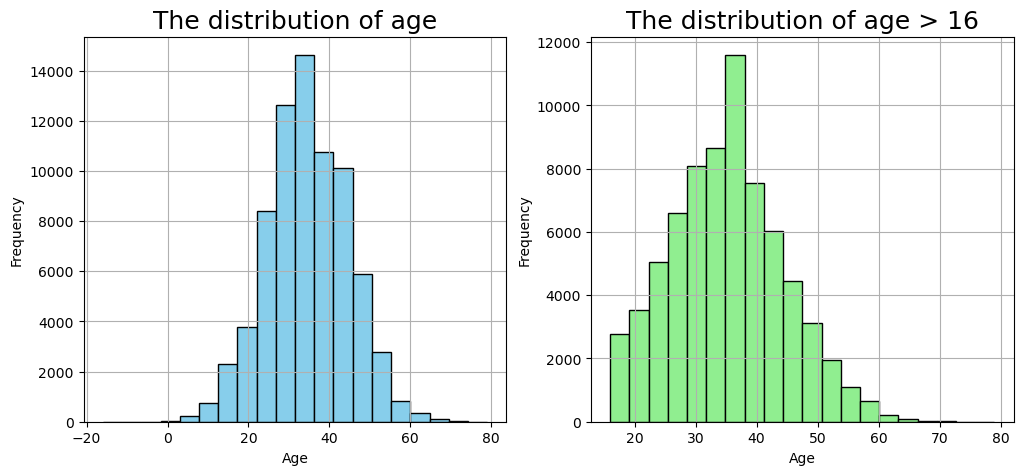

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for the entire "customer_age"
ax1.hist(df_modified["customer_age"], bins=20, color='skyblue', edgecolor='black')
ax1.set_title("The distribution of age", size=18)
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")
ax1.grid(True)

# Plot histogram for "customer_age >= 16"
ax2.hist(df_modified.query("customer_age >= 16")["customer_age"], bins=20, color='lightgreen', edgecolor='black')
ax2.set_title("The distribution of age > 16", size=18)
ax2.set_xlabel("Age")
ax2.set_ylabel("Frequency")
ax2.grid(True)

**I decided to remove the columns that has age less than 16**

In [17]:
wrong_age_indices = df_modified.query("customer_age <= 15").index
df_modified.drop(wrong_age_indices, axis = 0, inplace = True)

In [18]:
df_modified.describe()

,transaction_amount,transaction_date,quantity,customer_age,is_fraudulent,account_age_days,transaction_hour
count,71502.000000,71502,71502.000000,71502.000000,71502.000000,71502.000000,71502.000000
mean,225.422702,2024-02-16 15:33:20.087158272,2.995567,35.186960,0.050670,179.561747,11.283600
min,10.000000,2024-01-01 00:05:55,1.000000,16.000000,0.000000,1.000000,0.000000
25%,67.902500,2024-01-24 05:38:13.500000,2.000000,28.000000,0.000000,86.000000,5.000000
50%,150.990000,2024-02-16 16:32:58,3.000000,35.000000,0.000000,179.000000,11.000000
75%,294.337500,2024-03-11 01:03:30.249999872,4.000000,41.000000,0.000000,273.000000,17.000000
max,7090.900000,2024-04-03 08:11:00,5.000000,79.000000,1.000000,365.000000,23.000000
std,264.132896,NaN,1.413292,9.300172,0.219324,107.136075,6.985095


## Explotary analysis

In [19]:
df_modified.head()

,customer_location,transaction_amount,transaction_date,payment_method,product_category,quantity,customer_age,device_used,is_fraudulent,account_age_days,transaction_hour
1,Arroyoborough,292.86,2024-01-04 03:40:16,debit card,home & garden,3,22,mobile,0,148,3
2,Danielton,31.46,2024-01-20 06:15:28,debit card,toys & games,4,32,desktop,0,146,6
3,West Shannon,41.78,2024-03-29 15:53:59,bank transfer,clothing,5,27,mobile,0,216,15
5,Port Travisshire,119.58,2024-03-18 03:01:12,PayPal,health & beauty,5,26,desktop,0,215,3
6,East Brianview,273.27,2024-01-30 01:43:01,bank transfer,home & garden,1,30,desktop,0,264,1


In [20]:
df["is_fraudulent"].value_counts()

is_fraudulent
0    69905
1     3743
Name: count, dtype: int64

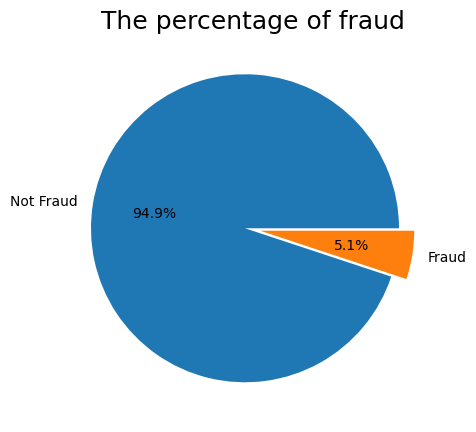

In [21]:
data = df["is_fraudulent"].value_counts()

plt.figure(figsize = (7, 5))
plt.pie(data, explode = [0.05, 0.05], autopct = "%1.1f%%", labels = ["Not Fraud", "Fraud"])

plt.title("The percentage of fraud", size = 18);

In [22]:
df_modified["customer_location"].value_counts()

customer_location
New Michael         74
East Michael        73
West Michael        67
Port Michael        61
Lake Michael        55
                    ..
South Jessefort      1
Lake Rickyside       1
West Angelaburgh     1
Garzaview            1
Nixonborough         1
Name: count, Length: 31272, dtype: int64

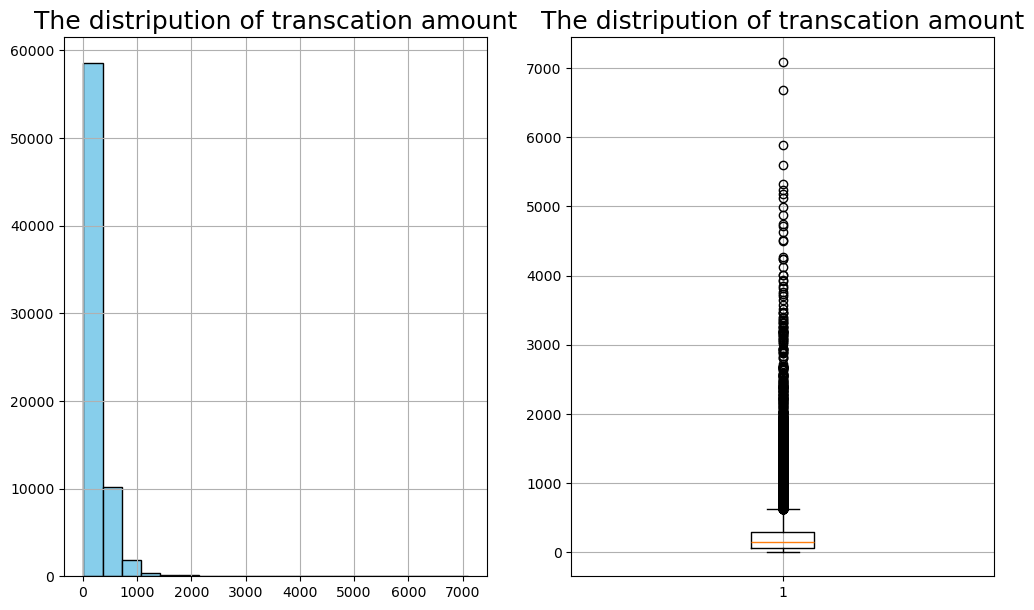

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 7))

ax1.hist(df_modified["transaction_amount"], bins = 20, color = "skyblue", edgecolor = "black")
ax1.set_title("The distripution of transcation amount", size = 18)
ax1.grid(True)

ax2.boxplot(df_modified["transaction_amount"])
ax2.set_title("The distripution of transcation amount", size = 18)
ax2.grid(True)

In [24]:
def pie_chart(column):
    data = column.value_counts()

    explode = np.full(len(data), 0.05)

    plt.figure(figsize = (7, 5))
    plt.pie(data, explode = explode, autopct = "%1.1f%%", labels = data.index)
    
    plt.title(f"The percentage of {column.name}", size = 18);

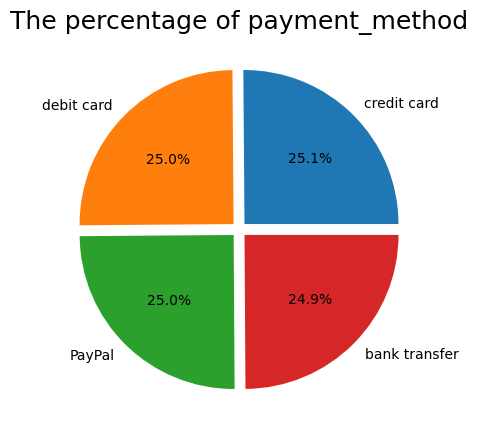

In [25]:
pie_chart(df_modified["payment_method"])

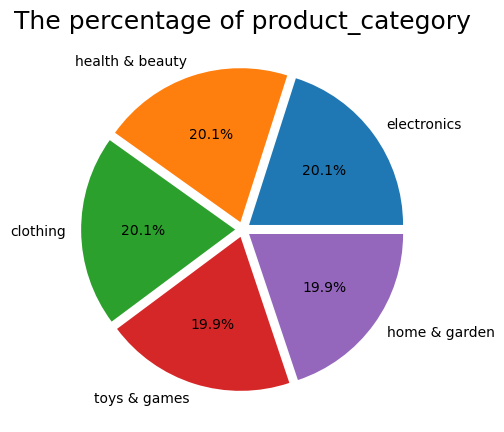

In [26]:
pie_chart(df_modified["product_category"])

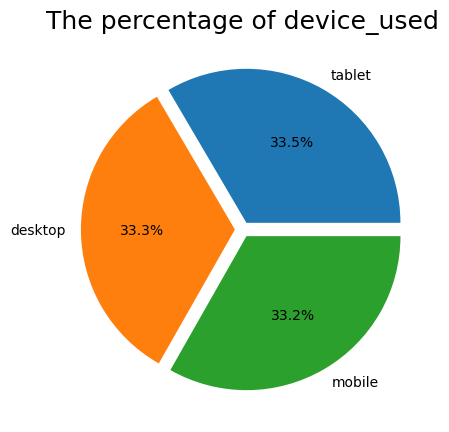

In [27]:
pie_chart(df_modified["device_used"])

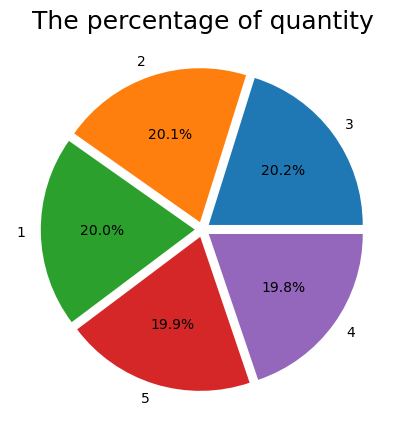

In [28]:
pie_chart(df_modified["quantity"])

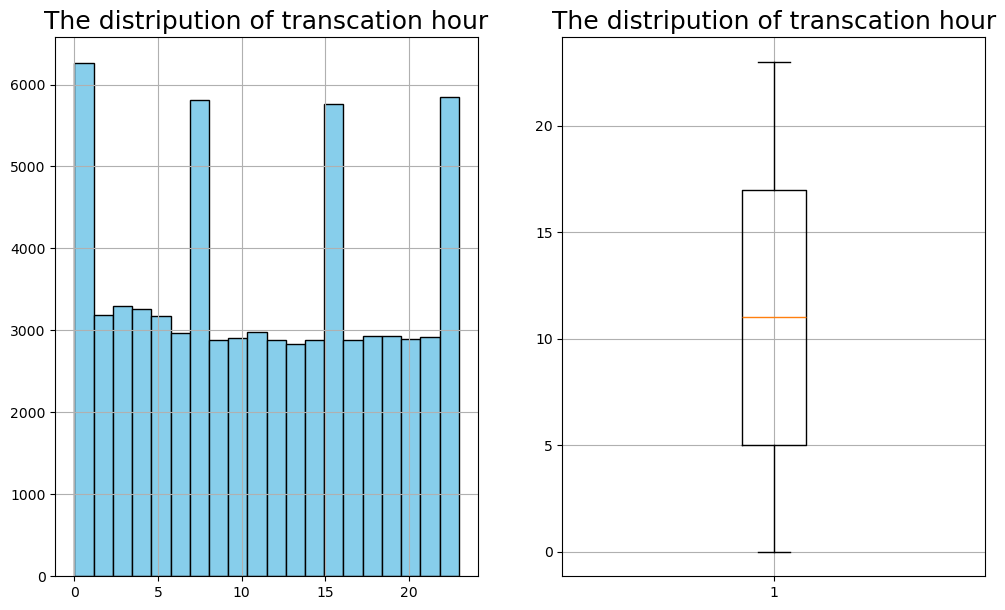

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 7))

ax1.hist(df_modified["transaction_hour"], bins = 20, color = "skyblue", edgecolor = "black")
ax1.set_title("The distripution of transcation hour", size = 18)
ax1.grid(True)

ax2.boxplot(df_modified["transaction_hour"])
ax2.set_title("The distripution of transcation hour", size = 18)
ax2.grid(True)

In [30]:
df_modified.head()

,customer_location,transaction_amount,transaction_date,payment_method,product_category,quantity,customer_age,device_used,is_fraudulent,account_age_days,transaction_hour
1,Arroyoborough,292.86,2024-01-04 03:40:16,debit card,home & garden,3,22,mobile,0,148,3
2,Danielton,31.46,2024-01-20 06:15:28,debit card,toys & games,4,32,desktop,0,146,6
3,West Shannon,41.78,2024-03-29 15:53:59,bank transfer,clothing,5,27,mobile,0,216,15
5,Port Travisshire,119.58,2024-03-18 03:01:12,PayPal,health & beauty,5,26,desktop,0,215,3
6,East Brianview,273.27,2024-01-30 01:43:01,bank transfer,home & garden,1,30,desktop,0,264,1


### studying the customer location
There are more than 36 K differnt location, so iam studying the best thing to do with these columns

In [31]:
print(f" The number of unique values {df_modified['customer_location'].nunique()}")

 The number of unique values 31272


In [32]:
df_modified["customer_location"].value_counts()

customer_location
New Michael         74
East Michael        73
West Michael        67
Port Michael        61
Lake Michael        55
                    ..
South Jessefort      1
Lake Rickyside       1
West Angelaburgh     1
Garzaview            1
Nixonborough         1
Name: count, Length: 31272, dtype: int64

In [33]:
# I will create a new dataframe for the number of fraudes in each location
grouped_df = pd.DataFrame(df.groupby("customer_location")["is_fraudulent"].agg(["sum", "count"]))
percentage = np.zeros(len(grouped_df)) #the percentage of fraud in each location
for index in range(len(grouped_df)):
    percentage[index] = round(grouped_df["sum"].iloc[index] / grouped_df["count"].iloc[index], 2)
    
grouped_df["percentage"] = percentage
grouped_df

,sum,count,percentage
customer_location,,,
Aaronberg,0,3,0.0
Aaronborough,2,4,0.5
Aaronburgh,0,4,0.0
Aaronbury,0,9,0.0
Aaronchester,0,6,0.0
...,...,...,...
Zunigaborough,0,1,0.0
Zunigahaven,0,1,0.0
Zunigashire,0,1,0.0


In [34]:
#This means that the locations that scored more than 0.5 in fraud percentage have had how many transcations
grouped_df.query("percentage >= 0.5")["count"].value_counts()

count
1    955
2    622
3     20
4     14
Name: count, dtype: int64

>**conclusion: most locations that has more than 50% frauds only had one transaction in the data, and the highst location have only 4 transactions, if i have feed this into the model it can be biased for certian locations**

In [35]:
#So let's drop the customer location column
df_modified.drop(["customer_location"], axis = 1, inplace = True)

## Feature engineering

## Transaction Date
**We want to add more features from the date feautre**
>**The day of the week**

>**The month of the year**

In [36]:
print(f"The oldest date is {df_modified['transaction_date'].min()}")
print(f"The newst date is {df_modified['transaction_date'].max()}")

The oldest date is 2024-01-01 00:05:55
The newst date is 2024-04-03 08:11:00


Lets add the day of the week  
0 = Monday  
1 = Tuesday  
2 = Wednesday  
3 = Thursday  
4 = Friday  
5 = Saturday  
6 = Sunday

In [37]:
df_modified["transaction_day"] = df_modified["transaction_date"].dt.weekday

In [38]:
# Extract the month of the year
df_modified["transaction_month"] = df_modified["transaction_date"].dt.month

In [39]:
df_modified

,transaction_amount,transaction_date,payment_method,product_category,quantity,customer_age,device_used,is_fraudulent,account_age_days,transaction_hour,transaction_day,transaction_month
1,292.86,2024-01-04 03:40:16,debit card,home & garden,3,22,mobile,0,148,3,3,1
2,31.46,2024-01-20 06:15:28,debit card,toys & games,4,32,desktop,0,146,6,5,1
3,41.78,2024-03-29 15:53:59,bank transfer,clothing,5,27,mobile,0,216,15,4,3
5,119.58,2024-03-18 03:01:12,PayPal,health & beauty,5,26,desktop,0,215,3,0,3
6,273.27,2024-01-30 01:43:01,bank transfer,home & garden,1,30,desktop,0,264,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
73643,651.09,2024-02-01 00:50:55,PayPal,toys & games,1,34,mobile,0,260,0,3,2
73644,262.17,2024-03-23 19:58:41,PayPal,health & beauty,5,42,mobile,0,125,19,5,3
73645,26.27,2024-03-25 23:26:57,credit card,electronics,1,28,desktop,0,334,23,0,3
73646,297.02,2024-03-02 14:34:37,bank transfer,home & garden,1,52,desktop,0,12,14,5,3


In [40]:
#Now we don't need the transaction date column
df_modified.drop(["transaction_date"], axis = 1, inplace = True)

## Encoding
Columns to encode
>**payment_method**

>**product_category**

>**device_used**

In [41]:
df_modified.sample(5)

,transaction_amount,payment_method,product_category,quantity,customer_age,device_used,is_fraudulent,account_age_days,transaction_hour,transaction_day,transaction_month
61505,445.25,bank transfer,toys & games,2,26,desktop,0,246,19,3,1
6623,41.17,credit card,clothing,3,19,desktop,0,86,15,0,1
9421,43.18,credit card,home & garden,2,48,mobile,0,332,11,0,3
17480,53.50,bank transfer,health & beauty,4,42,tablet,0,64,18,0,2
37710,24.83,debit card,home & garden,2,51,tablet,0,308,3,1,2


In [48]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()

df_modified["encoded_payment_method"] = label_encoder.fit_transform(df_modified["payment_method"])

mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapping:", mapping)

Mapping: {'PayPal': 0, 'bank transfer': 1, 'credit card': 2, 'debit card': 3}


In [50]:
#Product_category
df_modified["encoded_product_category"] = label_encoder.fit_transform(df_modified["product_category"])

mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapping:", mapping)

Mapping: {'clothing': 0, 'electronics': 1, 'health & beauty': 2, 'home & garden': 3, 'toys & games': 4}


In [51]:
#device_used
df_modified["encoded_device_used"] = label_encoder.fit_transform(df_modified["device_used"])

mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapping:", mapping)

Mapping: {'desktop': 0, 'mobile': 1, 'tablet': 2}


In [53]:
df_modified.drop(["payment_method", "product_category", "device_used"], axis = 1, inplace = True)
df_modified

,transaction_amount,quantity,customer_age,is_fraudulent,account_age_days,transaction_hour,transaction_day,transaction_month,encoded_payment_method,encoded_product_category,encoded_device_used
1,292.86,3,22,0,148,3,3,1,3,3,1
2,31.46,4,32,0,146,6,5,1,3,4,0
3,41.78,5,27,0,216,15,4,3,1,0,1
5,119.58,5,26,0,215,3,0,3,0,2,0
6,273.27,1,30,0,264,1,1,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
73643,651.09,1,34,0,260,0,3,2,0,4,1
73644,262.17,5,42,0,125,19,5,3,0,2,1
73645,26.27,1,28,0,334,23,0,3,2,1,0
73646,297.02,1,52,0,12,14,5,3,1,3,0


In [54]:
df_modified.to_csv("processed_samples.csv")